# Data Wrangling

In [1]:
! wget http://vis-www.cs.umass.edu/lfw/lfw.tgz

--2022-12-06 08:36:21--  http://vis-www.cs.umass.edu/lfw/lfw.tgz
Resolving vis-www.cs.umass.edu (vis-www.cs.umass.edu)... 128.119.244.95
Connecting to vis-www.cs.umass.edu (vis-www.cs.umass.edu)|128.119.244.95|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 180566744 (172M) [application/x-gzip]
Saving to: ‘lfw.tgz’

lfw.tgz             100%[===================>] 172.20M   103MB/s    in 1.7s    

2022-12-06 08:36:23 (103 MB/s) - ‘lfw.tgz’ saved [180566744/180566744]



In [2]:
! tar zxvf lfw.tgz

Streaming output truncated to the last 5000 lines.
lfw/Luis_Sanchez/
lfw/Luis_Sanchez/Luis_Sanchez_0001.jpg
lfw/Juliette_Binoche/
lfw/Juliette_Binoche/Juliette_Binoche_0001.jpg
lfw/Joel_Todd/
lfw/Joel_Todd/Joel_Todd_0001.jpg
lfw/Allan_Wagner/
lfw/Allan_Wagner/Allan_Wagner_0001.jpg
lfw/Alejandro_Fernandez/
lfw/Alejandro_Fernandez/Alejandro_Fernandez_0001.jpg
lfw/Guillaume_Depardieu/
lfw/Guillaume_Depardieu/Guillaume_Depardieu_0001.jpg
lfw/Delphine_Chuillot/
lfw/Delphine_Chuillot/Delphine_Chuillot_0001.jpg
lfw/Paul_LeClerc/
lfw/Paul_LeClerc/Paul_LeClerc_0001.jpg
lfw/Eddie_Jordan/
lfw/Eddie_Jordan/Eddie_Jordan_0001.jpg
lfw/Lionel_Richie/
lfw/Lionel_Richie/Lionel_Richie_0001.jpg
lfw/Lionel_Richie/Lionel_Richie_0002.jpg
lfw/Jose_Viegas_Filho/
lfw/Jose_Viegas_Filho/Jose_Viegas_Filho_0001.jpg
lfw/Jose_Viegas_Filho/Jose_Viegas_Filho_0002.jpg
lfw/Roger_Mahony/
lfw/Roger_Mahony/Roger_Mahony_0001.jpg
lfw/Clay_Aiken/
lfw/Clay_Aiken/Clay_Aiken_0001.jpg
lfw/Clay_Aiken/Clay_Aiken_0002.jpg
lfw/Clay_Ai

In [3]:
%%capture
!pip install insightface
!pip install onnxruntime

In [26]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
import glob
import shutil
import insightface
from insightface.app import FaceAnalysis
import tqdm
from sklearn.metrics import precision_recall_curve


# Data exploration

In [7]:
dataset_path = glob.glob('./lfw/*/*.jpg')

In [9]:
# num of images
len(glob.glob('./lfw/*/*.jpg'))

13233

In [10]:
# num of classes 
len(glob.glob('./lfw/*/'))

5749

(array([5.74e+03, 4.00e+00, 3.00e+00, 0.00e+00, 1.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00]),
 array([  1. ,  53.9, 106.8, 159.7, 212.6, 265.5, 318.4, 371.3, 424.2,
        477.1, 530. ]),
 <a list of 10 Patch objects>)

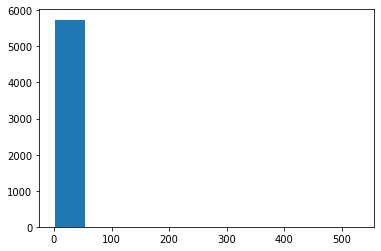

In [11]:
dataset_path = './lfw/*/'
num_images_distribution = []
for folder in glob.glob(dataset_path):
    file_paths = folder + '*.*' 
    num_images_of_person = len(glob.glob(file_paths)) 
    num_images_distribution.append(num_images_of_person)

plt.hist(num_images_distribution)


(array([5.591e+03, 9.600e+01, 2.800e+01, 1.500e+01, 7.000e+00, 4.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

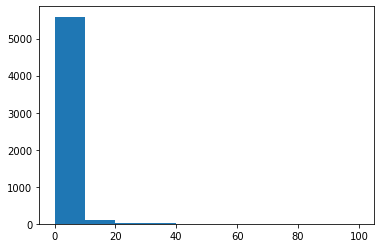

In [12]:
plt.hist(num_images_distribution, range=[0,100])


Text(0, 0.5, 'amount')

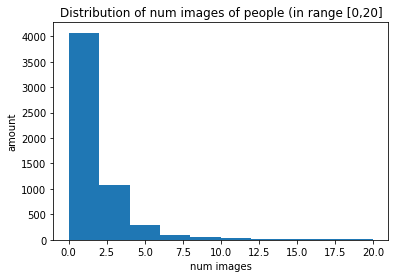

In [18]:
plt.hist(num_images_distribution, range=[0,20])
plt.title("Distribution of num images of people (in range [0,20]")
plt.xlabel("num images")
plt.ylabel("amount")

In [20]:
# clean data: remove person has 1 image
dataset_path = './lfw/*/'
for folder in glob.glob(dataset_path):
    file_paths = folder + '*.*' # get all file with any extension
    if len(glob.glob(file_paths)) == 1: # remove folder has 1 image
        shutil.rmtree(folder)

print('Total people:', len(glob.glob(dataset_path)))
print('Total images: ', len(glob.glob(dataset_path+'*.*')))

Total people: 1680
Total images:  9164


# Face Detection and Feature Extraction

In [22]:
model_name = 'buffalo_l'
app = FaceAnalysis(name=model_name, allowed_modules=['detection', 'recognition']) 
app.prepare(ctx_id=0, det_size=(640, 640))

download_path: /root/.insightface/models/buffalo_l


100%|██████████| 281857/281857 [00:38<00:00, 7406.88KB/s] 
/usr/local/lib/python3.8/dist-packages/onnxruntime/capi/onnxruntime_inference_collection.py:54: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /root/.insightface/models/buffalo_l/genderage.onnx genderage
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


In [24]:
def l2_normalize(x):
    return x / np.sqrt(np.sum(np.multiply(x, x)))

In [25]:
dataset_path = './lfw/*/'
emb_A = []
emb_B = []
emb_A_norm = []
emb_B_norm = []

for folder in tqdm.tqdm(glob.glob(dataset_path)):
    paths = glob.glob(folder + '*.*')[:2]
    path1 = paths[0]
    path2 = paths[1]

    img1 = cv2.imread(path1)
    img2 = cv2.imread(path2)

    faces1 = app.get(img1)
    faces2 = app.get(img2)

    if faces1 == [] or faces2 == []:
      continue

    face1 = sorted(faces1, key=lambda x:((x['bbox'][2]-x['bbox'][0])*(x['bbox'][3]-x['bbox'][1])), reverse=True)[0]
    face2 = sorted(faces2, key=lambda x:((x['bbox'][2]-x['bbox'][0])*(x['bbox'][3]-x['bbox'][1])), reverse=True)[0]

    emb1 = face1.embedding
    emb2 = face2.embedding

    emb1_norm = l2_normalize(emb1)
    emb2_norm = l2_normalize(emb2)

    emb_A.append(emb1)
    emb_B.append(emb2)
    emb_A_norm.append(emb1_norm)
    emb_B_norm.append(emb2_norm)

array_A = np.array(emb_A)
array_B = np.array(emb_B)
array_A_norm = np.array(emb_A_norm)
array_B_norm = np.array(emb_B_norm)

np.save('lfw_retina_arc_center_face_a.npy', array_A)
np.save('lfw_retina_arc_center_face_b.npy', array_B)

print("array_A shape", array_A.shape)
print("array_B shape", array_B.shape)

100%|██████████| 1680/1680 [51:45<00:00,  1.85s/it]

array_A shape (1672, 512)
array_B shape (1672, 512)


Threshold shape (1359740,)
0.36786744


<ipython-input-29-24d647c34e8d>:42: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('lfw_retina_arc_cosine_similarity_curve_center_face.png')
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


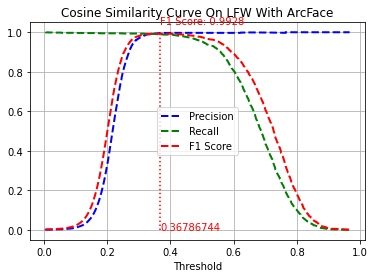

In [29]:
norm_array_A = np.linalg.norm(array_A, axis=1)
norm_array_B = np.linalg.norm(array_B, axis=1)

norm_array_A = norm_array_A.reshape(-1, 1)
norm_array_B = norm_array_B.reshape(1, -1)

mul = np.dot(array_A, array_B.T)
mul_norm = np.dot(norm_array_A, norm_array_B)

cosine_similarity = mul / mul_norm
y_pred = cosine_similarity.flatten()
y_pred = np.where(y_pred>1, 1, y_pred)
y_label = np.eye(N=cosine_similarity.shape[0], dtype=int).flatten()

precisions, recalls, thresholds = precision_recall_curve(y_label, y_pred)
f1_score = (2*precisions*recalls)/(precisions+recalls+1e-6)
print("Threshold shape", thresholds.shape)
threshold_index = np.argmax(f1_score)
threshold_value = thresholds[threshold_index]
precision_value = precisions[threshold_index]
recall_value = recalls[threshold_index]
f1_score_value = f1_score[threshold_index]

print(threshold_value)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g--", label="Recall", linewidth=2)
plt.plot(thresholds, f1_score[:-1], "r--", label="F1 Score", linewidth=2)

# line at threshold value
plt.plot([threshold_value, threshold_value], [0,1], "r:")   

plt.text(threshold_value, 0, threshold_value, c='r')  
plt.text(threshold_value, f1_score_value+0.05, "F1 Score: {:.4f}".format(f1_score_value), c='r')  

plt.legend() 
plt.grid(True)
plt.xlabel("Threshold")
plt.title("Cosine Similarity Curve On LFW With ArcFace")
plt.savefig('lfw_retina_arc_cosine_similarity_curve_center_face.png')
plt.show()